Step 1: Libraries

Cell 1 – Import Pandas & Numpy

In [1]:

import pandas as pd
import numpy as np
import csv



Cell 2 – Import Visualization Libraries

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns


Cell 3 – Import Path Handling

In [3]:

from pathlib import Path


Cell 4 – Set Random Seed

In [4]:

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
print("Random seed set to:", RANDOM_STATE)


Random seed set to: 42


Step 2: Dataset Loading & Inspection

Cell 5 – Define Dataset Path

In [5]:

DATA_PATH = Path("books.csv")   # ensure books.csv is in the same folder
print("Looking for dataset at:", DATA_PATH.resolve())


Looking for dataset at: C:\Users\MSI PC\Desktop\python project ml\python project ml\books.csv


Cell 6 – Load Dataset

In [6]:
##from pathlib import Path
##DATA_PATH = Path(r"C:\\Users\\DELL\\Desktop\\python project ml\\Project 1")
##print("Reading from:", DATA_PATH)
##assert DATA_PATH.exists(), f"File not found: {DATA_PATH}"



In [8]:
from pathlib import Path

# Correct, full path to the CSV
file_path = Path(r"C:\Users\MSI PC\Desktop\python project ml\python project ml\Project 1\books.csv")

if file_path.exists():
    print("File found:", file_path)
    print("\nFiles in the same folder:")
    for p in file_path.parent.iterdir():
        print("-", p.name)
else:
    print("File NOT found:", file_path)
    # Show the deepest existing parent to help debug
    cur = file_path
    while not cur.exists():
        cur = cur.parent
    print("Closest existing path:", cur)
    print("It contains:")
    for p in cur.iterdir():
        print("-", p.name)


File found: C:\Users\MSI PC\Desktop\python project ml\python project ml\Project 1\books.csv

Files in the same folder:
- books.csv
- Project1_PythonML_S25.pdf


In [13]:
from pathlib import Path
import pandas as pd
import csv

# ---- 1) Point to the correct file (use a raw string r"..." to keep backslashes literal)
DATA_PATH = Path(r"C:\Users\MSI PC\Desktop\python project ml\python project ml\Project 1\books.csv")

print("Reading from:", DATA_PATH)

# If the file isn’t exactly there, show what exists to debug quickly
if not DATA_PATH.exists():
    print("\n❌ File not found:", DATA_PATH)
    parent = DATA_PATH.parent
    while not parent.exists() and parent != parent.parent:
        parent = parent.parent
    print("Closest existing path:", parent)
    print("It contains:")
    try:
        for p in parent.iterdir():
            print(" -", p.name)
    except Exception as e:
        print(" (could not list directory contents:", e, ")")
    raise FileNotFoundError(DATA_PATH)

# ---- 2) Load CSV with a safe fallback
def read_csv_safe(path: Path) -> pd.DataFrame:
    try:
        # Fast default engine
        df_ = pd.read_csv(path, encoding="utf-8")
        print("Loaded with default engine (c).")
        return df_
    except Exception as e:
        print("Default engine failed -> trying python engine:", e)
        return pd.read_csv(
            path,
            sep=",",
            encoding="utf-8",
            engine="python",
            quotechar='"',
            escapechar="\\",
            doublequote=True,
            quoting=csv.QUOTE_MINIMAL,
            on_bad_lines="skip",   # change to "warn" if you want to see messages
        )

df = read_csv_safe(DATA_PATH)

print("\n✅ Loaded!")
print("Shape:", df.shape)
print(df.head(10))


Reading from: C:\Users\MSI PC\Desktop\python project ml\python project ml\Project 1\books.csv
Default engine failed -> trying python engine: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13


✅ Loaded!
Shape: (11119, 12)
   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
5       9  Unauthorized Harry Potter Book Seven News: "Ha...   
6      10       Harry Potter Collection (Harry Potter  #1-6)   
7      12  The Ultimate Hitchhiker's Guide: Five Complete...   
8      13  The Ultimate Hitchhiker's Guide to the Galaxy ...   
9      14  The Hitchhiker's Guide to the Galaxy (Hitchhik...   

                      authors  average_rating      

Cell 7 – Dataset Shape

In [14]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 11119
Columns: 12


Cell 8 – Dataset Columns

In [15]:

print("Columns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']


Cell 9 – Inspect raw column names (shows hidden spaces/characters)

In [16]:
print(df.columns.tolist())
for i, c in enumerate(df.columns, start=1):
    print(i, repr(c))


['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']
1 'bookID'
2 'title'
3 'authors'
4 'average_rating'
5 'isbn'
6 'isbn13'
7 'language_code'
8 '  num_pages'
9 'ratings_count'
10 'text_reviews_count'
11 'publication_date'
12 'publisher'


Cell 10 – Standardize and alias column names

In [17]:
# Strip spaces and unify casing
df.rename(columns=lambda c: c.strip(), inplace=True)

def normalize_name(s: str) -> str:
    s = s.strip().lower()
    # keep only letters/numbers/underscore to defeat hidden chars (e.g., BOM)
    return "".join(ch for ch in s if ch.isalnum() or ch == "_")

# Map common variants to the project’s expected names
alias_map = {
    "bookid": "bookID",
    "title": "title",
    "authors": "authors",
    "averagerating": "average_rating",
    "isbn": "isbn",
    "isbn13": "isbn13",
    "languagecode": "language_code",
    "numpages": "num_pages",
    "pages": "num_pages",
    "ratingscount": "ratings_count",
    "workratingscount": "ratings_count",
    "textreviewscount": "text_reviews_count",
    "worktextreviewscount": "text_reviews_count",
    "publicationdate": "publication_date",
    "pubdate": "publication_date",
    "publisher": "publisher",
}

rename_dict = {}
for col in df.columns:
    key = normalize_name(col)
    if key in alias_map:
        rename_dict[col] = alias_map[key]

df.rename(columns=rename_dict, inplace=True)


Cell 11 – Verify standardized column names

In [18]:
print(df.columns.tolist())
required = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
missing = [c for c in required if c not in df.columns]
print("Missing required columns after standardization:", missing)


['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']
Missing required columns after standardization: []


Cell 12 – Parse Dates

In [19]:

df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
print("publication_date converted to datetime")


publication_date converted to datetime


Cell 13 – Dataset Info

In [20]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11119 non-null  int64         
 1   title               11119 non-null  object        
 2   authors             11119 non-null  object        
 3   average_rating      11119 non-null  float64       
 4   isbn                11119 non-null  object        
 5   isbn13              11119 non-null  int64         
 6   language_code       11119 non-null  object        
 7   num_pages           11119 non-null  int64         
 8   ratings_count       11119 non-null  int64         
 9   text_reviews_count  11119 non-null  int64         
 10  publication_date    11117 non-null  datetime64[ns]
 11  publisher           11119 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.0+ MB


Cell 14 – Preview First Rows

In [21]:

df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


Cell 15 – Missing Values

In [22]:

df.isna().sum().sort_values(ascending=False)


publication_date      2
bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publisher             0
dtype: int64

Cell 16 – Numeric Summary

In [23]:
candidate_cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
num_cols = [c for c in candidate_cols if c in df.columns]

print("Using numeric columns:", num_cols)
if not num_cols:
    raise ValueError("None of the expected numeric columns are present. Check earlier cells.")

# Ensure numeric dtype
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df[num_cols].describe()


Using numeric columns: ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']


,average_rating,num_pages,ratings_count,text_reviews_count
count,11119.000000,11119.000000,1.111900e+04,11119.000000
mean,3.934135,336.439788,1.794832e+04,542.167371
std,0.350384,241.177969,1.125190e+05,2577.069549
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,47.000000
75%,4.135000,416.000000,5.000500e+03,238.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


Cell 17 – Duplicate Check

In [24]:

dup_isbn13 = df['isbn13'].duplicated().sum()
dup_title_auth = df.duplicated(subset=['title','authors']).sum()

print("Duplicates by isbn13:", dup_isbn13)
print("Duplicates by title+authors:", dup_title_auth)


Duplicates by isbn13: 0
Duplicates by title+authors: 311


Cell 18 – Target Variable Distribution

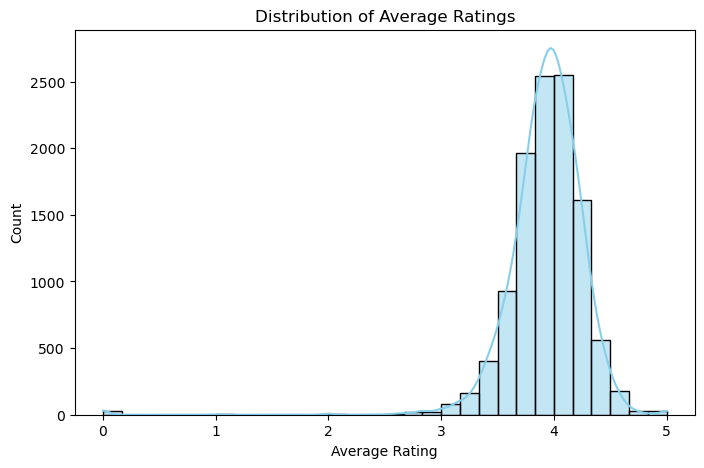

In [25]:

plt.figure(figsize=(8,5))
sns.histplot(df['average_rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()


Cell 19 – Number of Pages Distribution

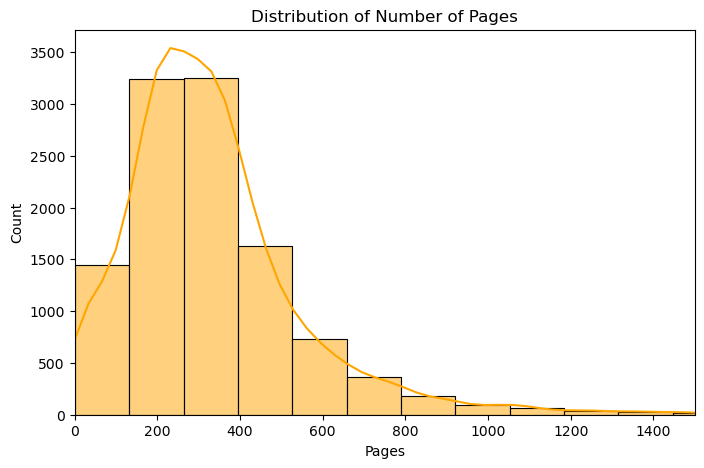

In [26]:

plt.figure(figsize=(8,5))
sns.histplot(df['num_pages'], bins=50, kde=True, color='orange')
plt.title("Distribution of Number of Pages")
plt.xlabel("Pages")
plt.ylabel("Count")
plt.xlim(0, 1500)
plt.show()


Cell 20 – Ratings Count Distribution

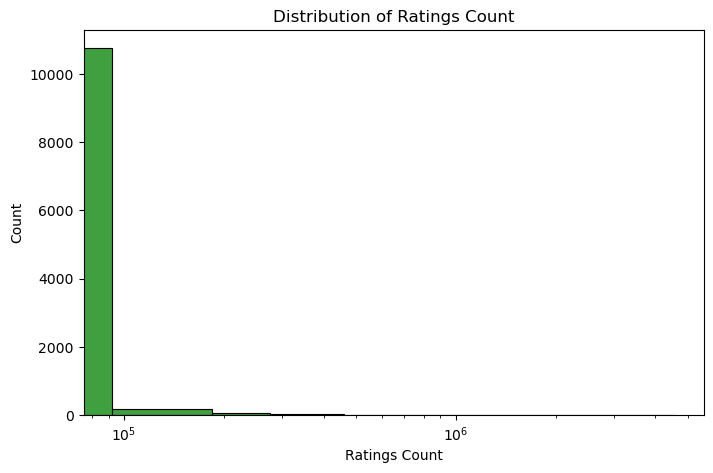

In [27]:

plt.figure(figsize=(8,5))
sns.histplot(df['ratings_count'], bins=50, color='green')
plt.title("Distribution of Ratings Count")
plt.xlabel("Ratings Count")
plt.ylabel("Count")
plt.xscale("log")
plt.show()


Cell 21 – Text Reviews Count Distribution

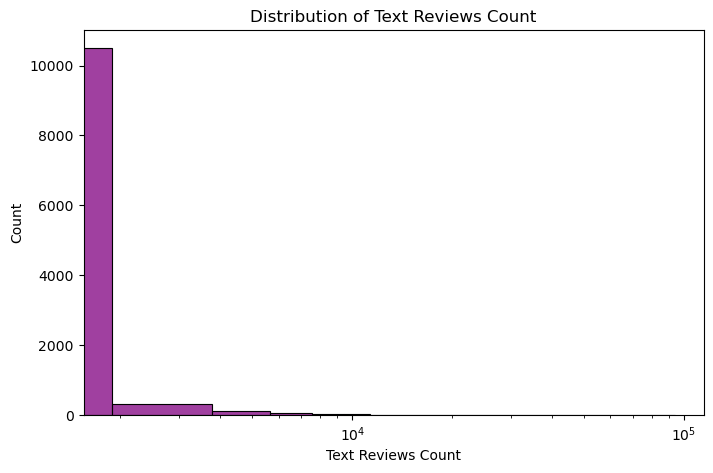

In [28]:

plt.figure(figsize=(8,5))
sns.histplot(df['text_reviews_count'], bins=50, color='purple')
plt.title("Distribution of Text Reviews Count")
plt.xlabel("Text Reviews Count")
plt.ylabel("Count")
plt.xscale("log")
plt.show()


Cell 22 – Correlation Heatmap

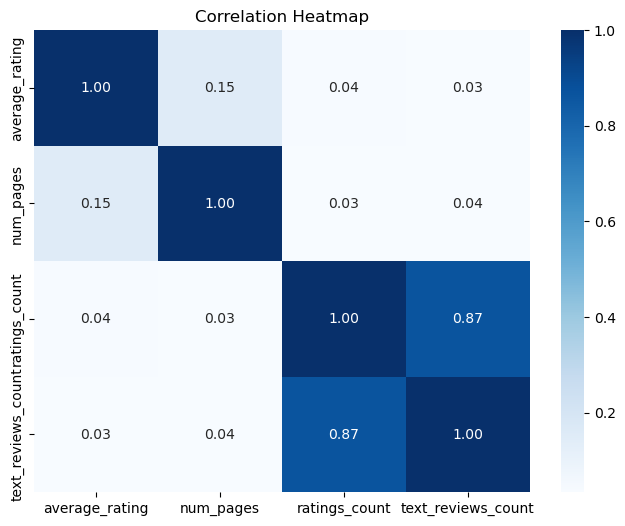

In [29]:

plt.figure(figsize=(8,6))
corr = df[['average_rating','num_pages','ratings_count','text_reviews_count']].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Cell 23 – Average Rating vs Number of Pages

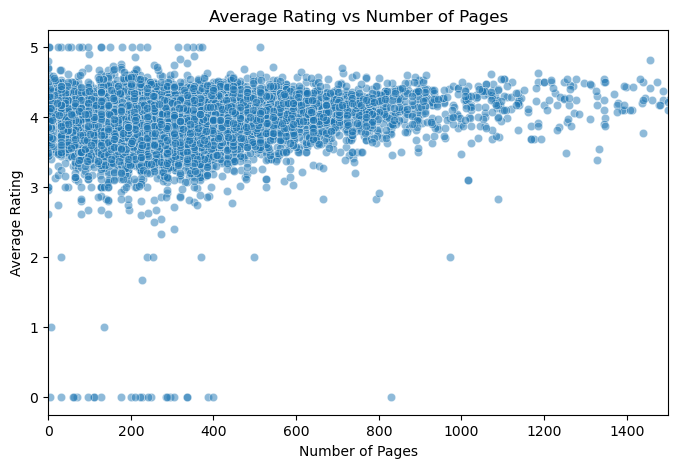

In [30]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='num_pages', y='average_rating', data=df, alpha=0.5)
plt.title("Average Rating vs Number of Pages")
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.xlim(0, 1500)
plt.show()


Cell 24 – Average Rating vs Ratings Count

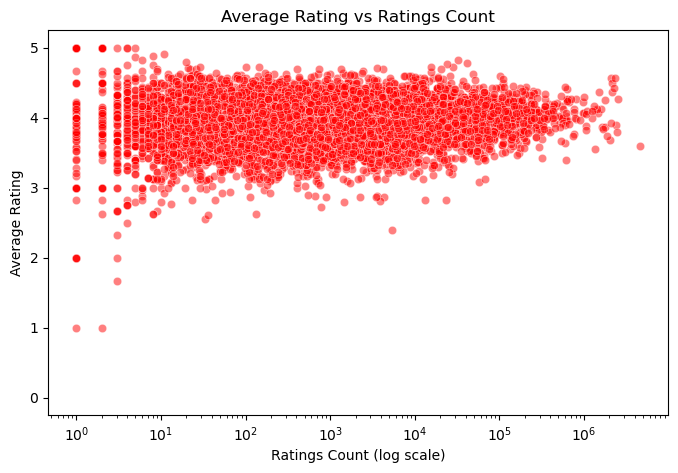

In [31]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='ratings_count', y='average_rating', data=df, alpha=0.5, color='red')
plt.title("Average Rating vs Ratings Count")
plt.xlabel("Ratings Count (log scale)")
plt.ylabel("Average Rating")
plt.xscale("log")
plt.show()


Cell 25 – Average Rating by Language

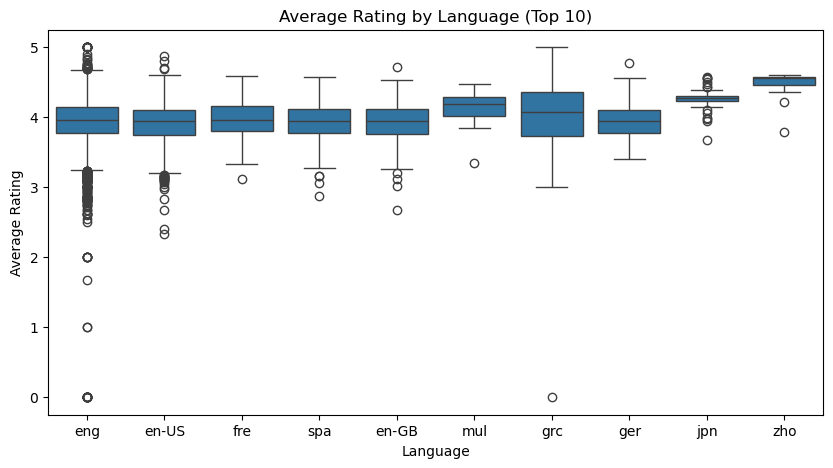

In [32]:

top_langs = df['language_code'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.boxplot(x='language_code', y='average_rating', data=df[df['language_code'].isin(top_langs)])
plt.title("Average Rating by Language (Top 10)")
plt.xlabel("Language")
plt.ylabel("Average Rating")
plt.show()


Cell 26 – Average Rating by Publisher

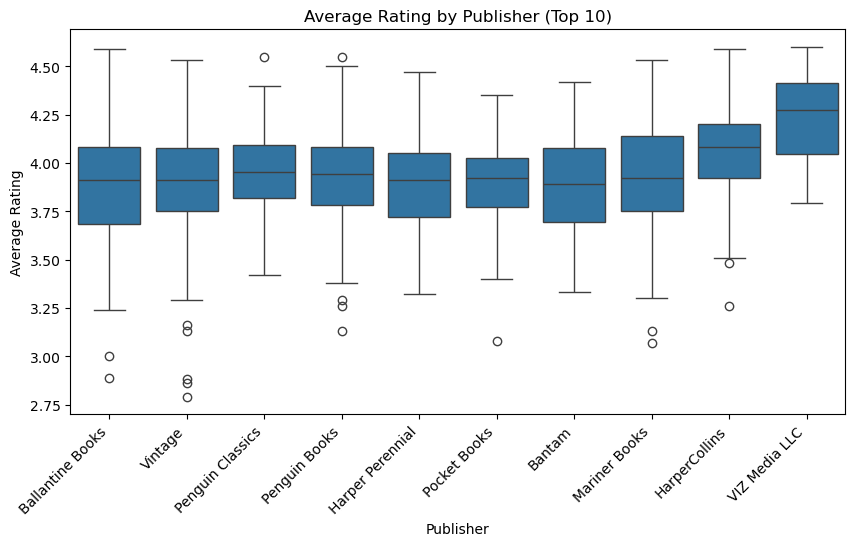

In [33]:

top_pubs = df['publisher'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.boxplot(x='publisher', y='average_rating', data=df[df['publisher'].isin(top_pubs)])
plt.xticks(rotation=45, ha='right')
plt.title("Average Rating by Publisher (Top 10)")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.show()


Cell 27 – Average Rating by Year

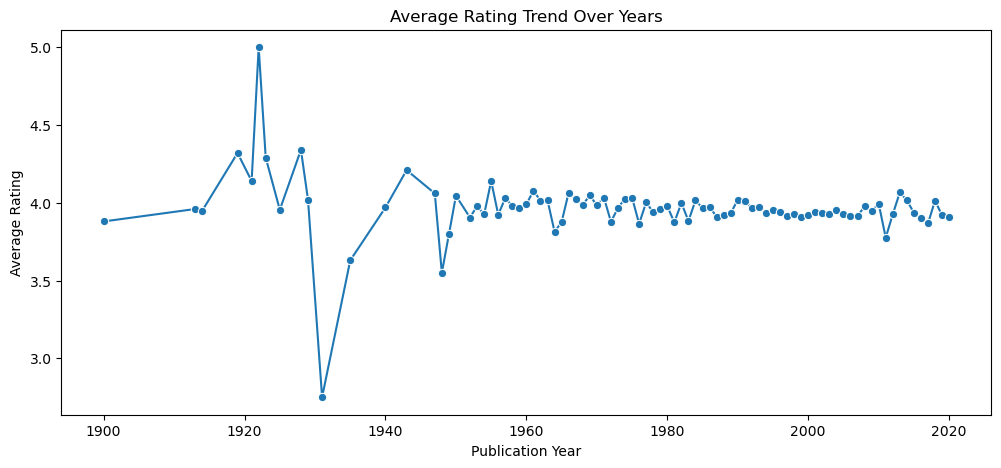

In [34]:

df['year'] = df['publication_date'].dt.year

plt.figure(figsize=(12,5))
sns.lineplot(x='year', y='average_rating', 
             data=df.groupby('year')['average_rating'].mean().reset_index(), marker="o")
plt.title("Average Rating Trend Over Years")
plt.xlabel("Publication Year")
plt.ylabel("Average Rating")
plt.show()


Step 3: Exploratory Data Analysis (EDA)



Cell 28 – Distribution: num_pages (trimmed to 99th percentile)

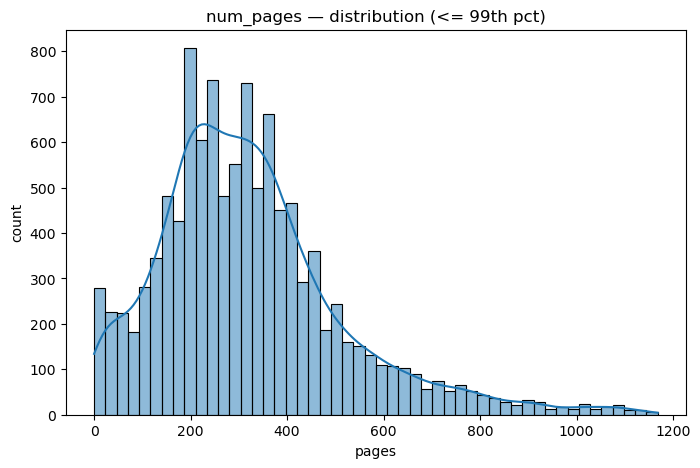

In [35]:
if 'num_pages' in df.columns:
    upper = df['num_pages'].quantile(0.99)
    plt.figure(figsize=(8,5))
    sns.histplot(df.loc[df['num_pages'] <= upper, 'num_pages'].dropna(), bins=50, kde=True)
    plt.title("num_pages — distribution (<= 99th pct)")
    plt.xlabel("pages")
    plt.ylabel("count")
    plt.show()
else:
    print("num_pages not available.")


Cell 29 – Distribution: ratings_count (raw)

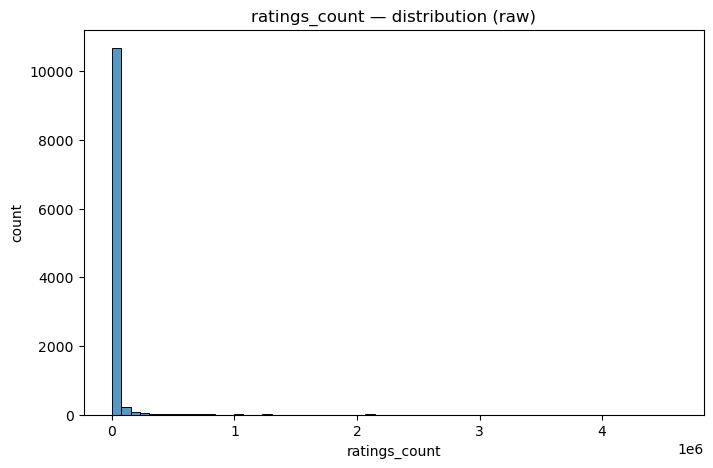

In [36]:
if 'ratings_count' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['ratings_count'].dropna(), bins=60)
    plt.title("ratings_count — distribution (raw)")
    plt.xlabel("ratings_count")
    plt.ylabel("count")
    plt.show()
else:
    print("ratings_count not available.")


Cell 30 – Distribution: ratings_count (log x-axis)

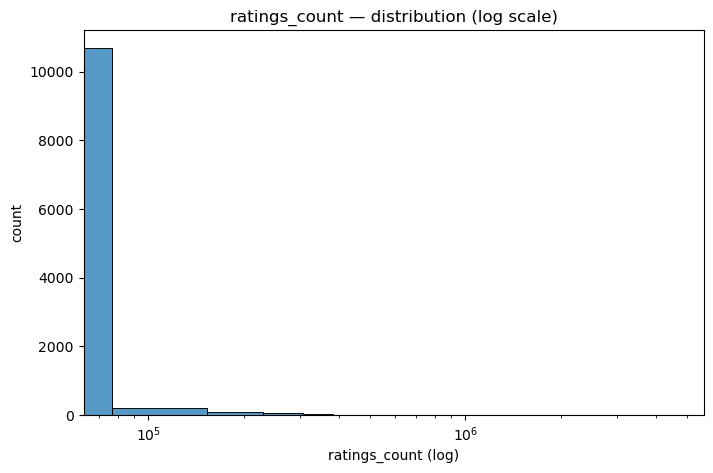

In [37]:
if 'ratings_count' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['ratings_count'].dropna(), bins=60)
    plt.xscale("log")
    plt.title("ratings_count — distribution (log scale)")
    plt.xlabel("ratings_count (log)")
    plt.ylabel("count")
    plt.show()


Cell 31 – Distribution: text_reviews_count (raw)

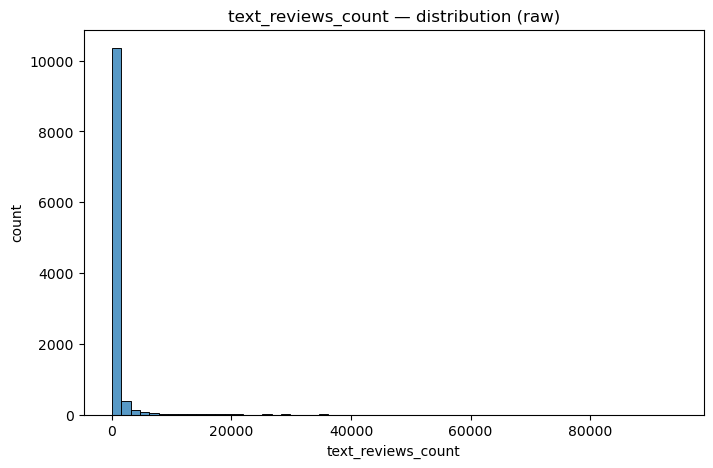

In [38]:
if 'text_reviews_count' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['text_reviews_count'].dropna(), bins=60)
    plt.title("text_reviews_count — distribution (raw)")
    plt.xlabel("text_reviews_count")
    plt.ylabel("count")
    plt.show()
else:
    print("text_reviews_count not available.")


Cell 32 – Distribution: text_reviews_count (log x-axis)

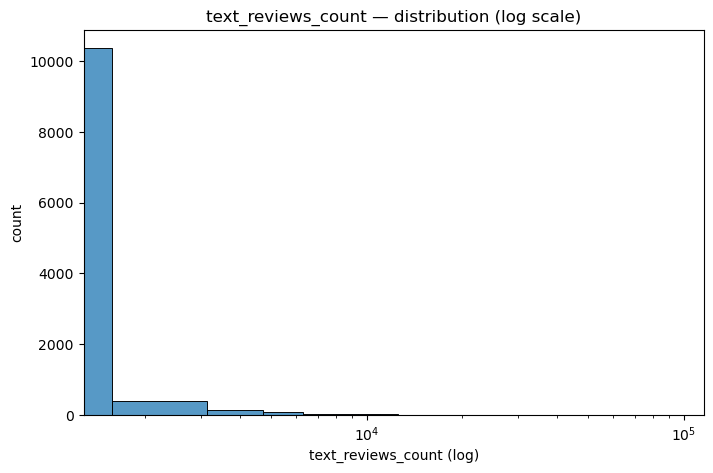

In [39]:
if 'text_reviews_count' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['text_reviews_count'].dropna(), bins=60)
    plt.xscale("log")
    plt.title("text_reviews_count — distribution (log scale)")
    plt.xlabel("text_reviews_count (log)")
    plt.ylabel("count")
    plt.show()


Cell 33 – Correlation heatmap (Spearman, robust to skew)

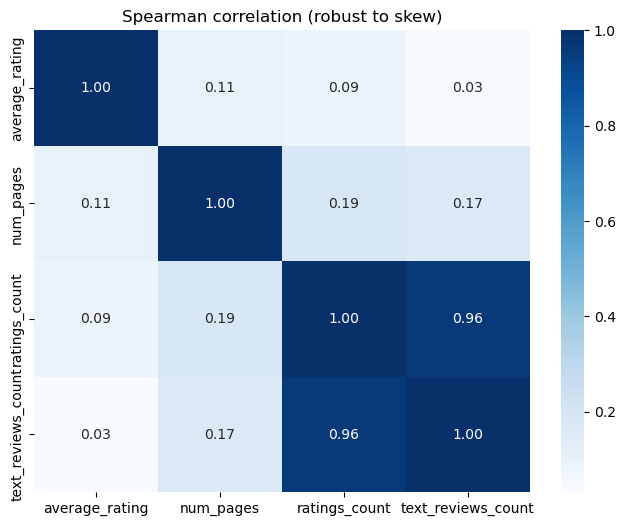

In [40]:
subset_cols = [c for c in ['average_rating','num_pages','ratings_count','text_reviews_count'] if c in df.columns]
if subset_cols:
    corr_spear = df[subset_cols].corr(method='spearman', numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_spear, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Spearman correlation (robust to skew)")
    plt.show()
else:
    print("No numeric columns available for correlation.")


Cell 34 – Scatter: average_rating vs num_pages

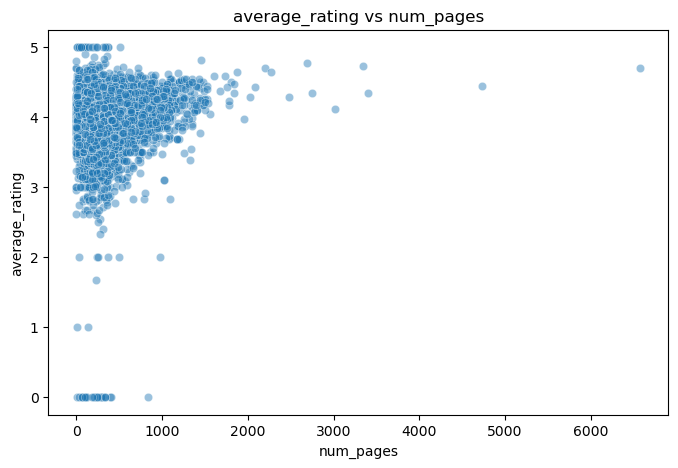

In [41]:
if set(['average_rating','num_pages']).issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='num_pages', y='average_rating', data=df, alpha=0.45)
    plt.title("average_rating vs num_pages")
    plt.xlabel("num_pages")
    plt.ylabel("average_rating")
    plt.show()
else:
    print("Required columns not available for this plot.")


Cell 35 – Scatter: average_rating vs ratings_count (log x-axis)

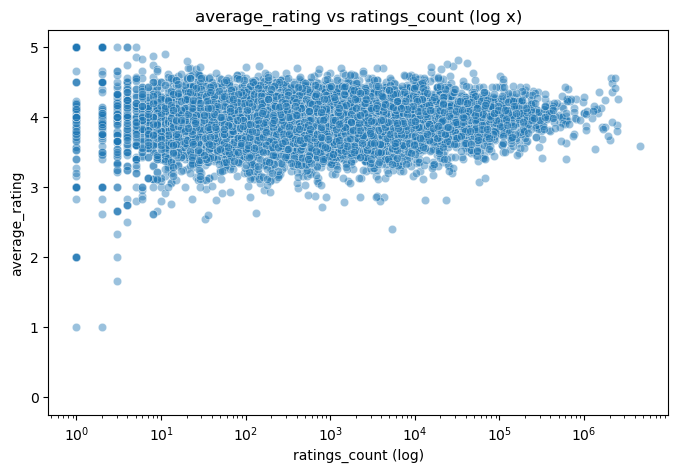

In [42]:
if set(['average_rating','ratings_count']).issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='ratings_count', y='average_rating', data=df, alpha=0.45)
    plt.xscale("log")
    plt.title("average_rating vs ratings_count (log x)")
    plt.xlabel("ratings_count (log)")
    plt.ylabel("average_rating")
    plt.show()
else:
    print("Required columns not available for this plot.")


Cell 36 – Scatter: average_rating vs text_reviews_count (log x-axis)

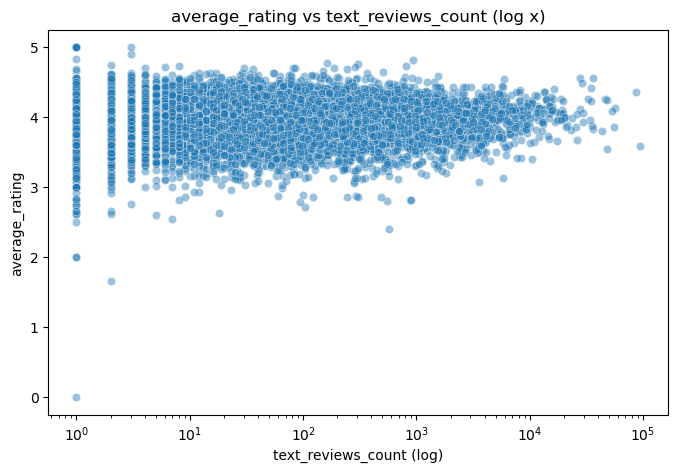

In [43]:
if set(['average_rating','text_reviews_count']).issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='text_reviews_count', y='average_rating', data=df, alpha=0.45)
    plt.xscale("log")
    plt.title("average_rating vs text_reviews_count (log x)")
    plt.xlabel("text_reviews_count (log)")
    plt.ylabel("average_rating")
    plt.show()
else:
    print("Required columns not available for this plot.")


Cell 37 – Ensure year column exists

In [44]:
if 'publication_date' in df.columns and 'year' not in df.columns:
    df['year'] = df['publication_date'].dt.year
print("year column present:", 'year' in df.columns)


year column present: True


Cell 38 – Average rating by publication year (trend)

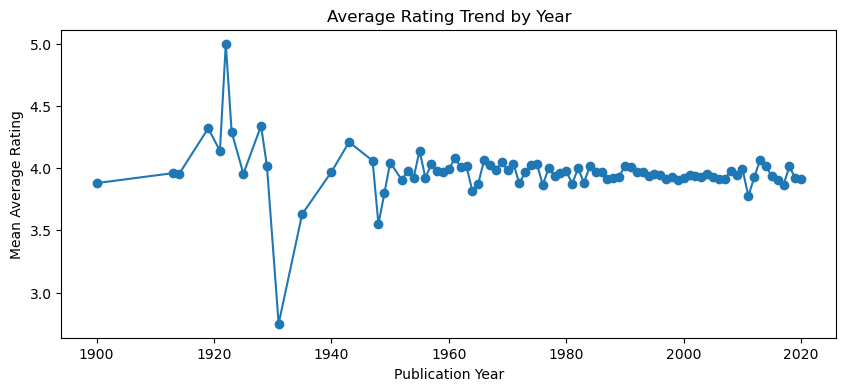

In [45]:
if set(['year','average_rating']).issubset(df.columns):
    trend = df.groupby('year', dropna=True)['average_rating'].mean().reset_index()
    plt.figure(figsize=(10,4))
    plt.plot(trend['year'], trend['average_rating'], marker="o")
    plt.title("Average Rating Trend by Year")
    plt.xlabel("Publication Year")
    plt.ylabel("Mean Average Rating")
    plt.show()
else:
    print("year/average_rating not available for trend plot.")


Cell 39 – Count: top 10 languages

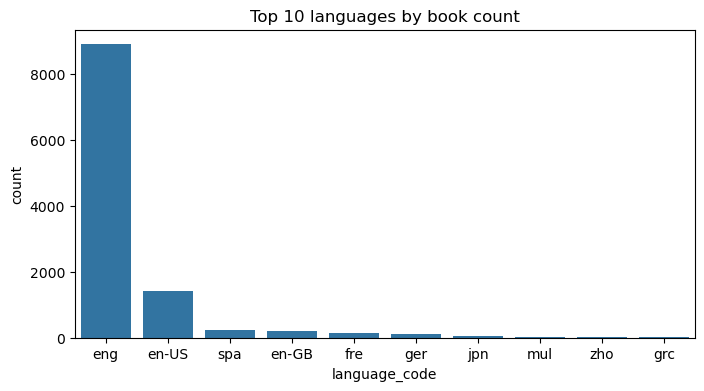

In [46]:
if 'language_code' in df.columns:
    top_langs = df['language_code'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_langs.index, y=top_langs.values)
    plt.title("Top 10 languages by book count")
    plt.xlabel("language_code")
    plt.ylabel("count")
    plt.show()
else:
    print("language_code not available.")


Cell 40 – Boxplot: average_rating by language (top 10)

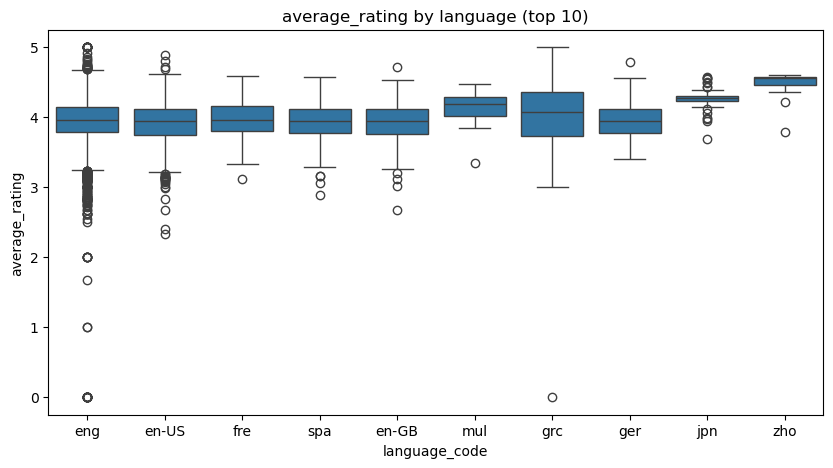

In [47]:
if set(['language_code','average_rating']).issubset(df.columns):
    langs = df['language_code'].value_counts().head(10).index
    plt.figure(figsize=(10,5))
    sns.boxplot(x='language_code', y='average_rating', data=df[df['language_code'].isin(langs)])
    plt.title("average_rating by language (top 10)")
    plt.xlabel("language_code")
    plt.ylabel("average_rating")
    plt.show()
else:
    print("Required columns not available.")


Cell 41 – Count: top 10 publishers

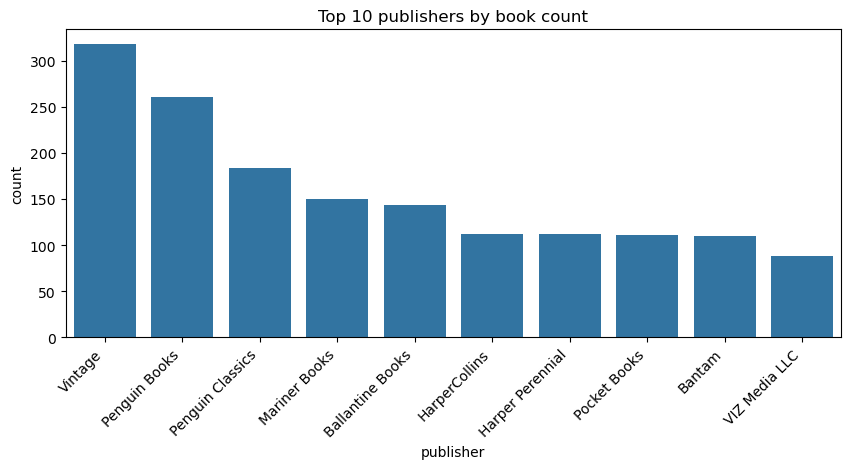

In [48]:
if 'publisher' in df.columns:
    top_pubs = df['publisher'].value_counts().head(10)
    plt.figure(figsize=(10,4))
    sns.barplot(x=top_pubs.index, y=top_pubs.values)
    plt.xticks(rotation=45, ha='right')
    plt.title("Top 10 publishers by book count")
    plt.xlabel("publisher")
    plt.ylabel("count")
    plt.show()
else:
    print("publisher not available.")


Cell 42 – Boxplot: average_rating by publisher (top 10)

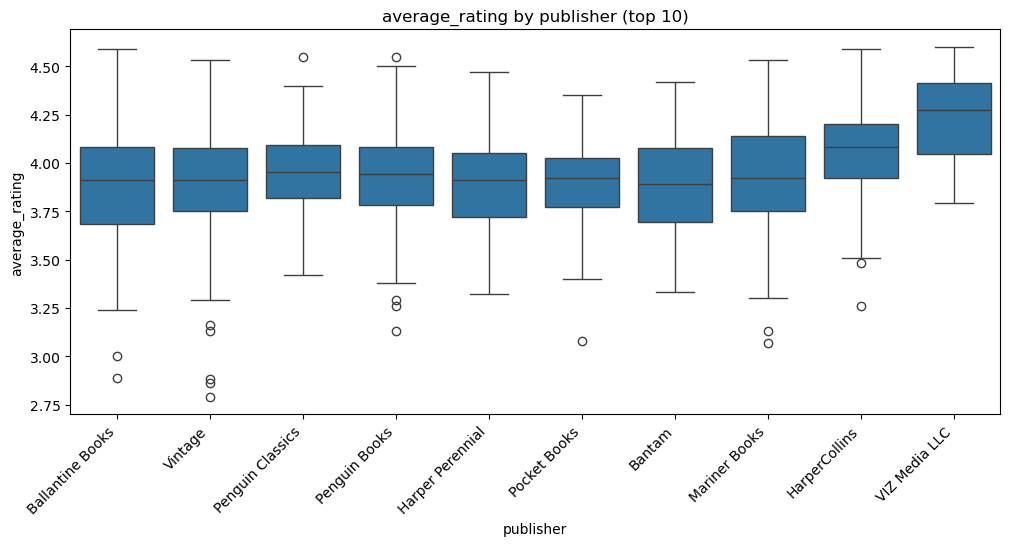

In [49]:
if set(['publisher','average_rating']).issubset(df.columns):
    pubs = df['publisher'].value_counts().head(10).index
    plt.figure(figsize=(12,5))
    sns.boxplot(x='publisher', y='average_rating', data=df[df['publisher'].isin(pubs)])
    plt.xticks(rotation=45, ha='right')
    plt.title("average_rating by publisher (top 10)")
    plt.xlabel("publisher")
    plt.ylabel("average_rating")
    plt.show()
else:
    print("Required columns not available.")


Cell 43 – Feature engineering: authors_count

In [50]:
if 'authors' in df.columns:
    df['authors_count'] = df['authors'].fillna("").apply(lambda x: len([a for a in str(x).split('/') if a.strip()]))
    print("authors_count created.")
else:
    print("authors column not available.")


authors_count created.


Cell 44 – Distribution: authors_count

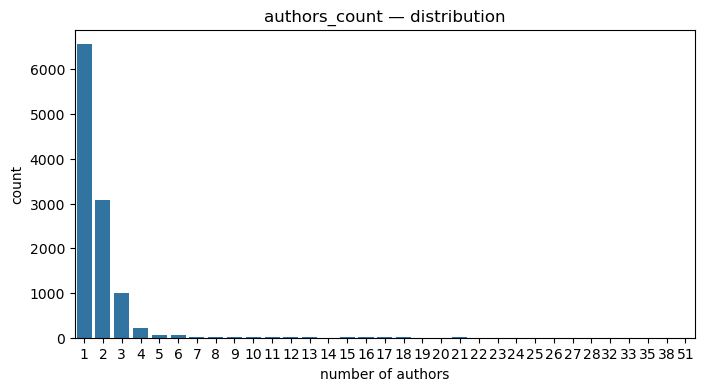

In [51]:
if 'authors_count' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='authors_count', data=df)
    plt.title("authors_count — distribution")
    plt.xlabel("number of authors")
    plt.ylabel("count")
    plt.show()
else:
    print("authors_count not available.")


Cell 45 – Boxplot: average_rating by authors_count

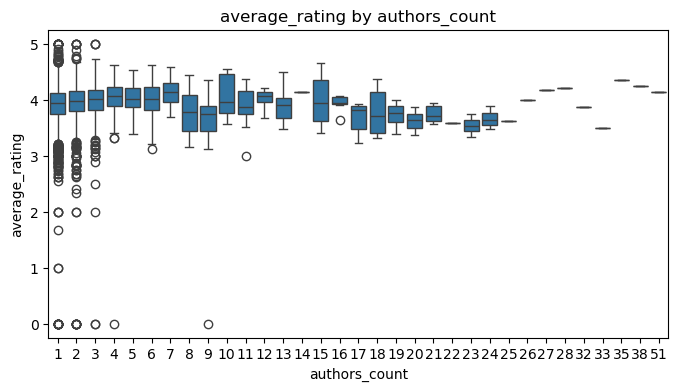

In [52]:
if set(['authors_count','average_rating']).issubset(df.columns):
    plt.figure(figsize=(8,4))
    sns.boxplot(x='authors_count', y='average_rating', data=df)
    plt.title("average_rating by authors_count")
    plt.xlabel("authors_count")
    plt.ylabel("average_rating")
    plt.show()
else:
    print("Required columns not available.")


Cell 46 – Create log features (ratings/text_reviews)

In [53]:
if 'ratings_count' in df.columns:
    df['log_ratings_count'] = np.log1p(df['ratings_count'])
if 'text_reviews_count' in df.columns:
    df['log_text_reviews_count'] = np.log1p(df['text_reviews_count'])
print("Created:", [c for c in ['log_ratings_count','log_text_reviews_count'] if c in df.columns])


Created: ['log_ratings_count', 'log_text_reviews_count']


Cell 47 – Scatter: average_rating vs log features

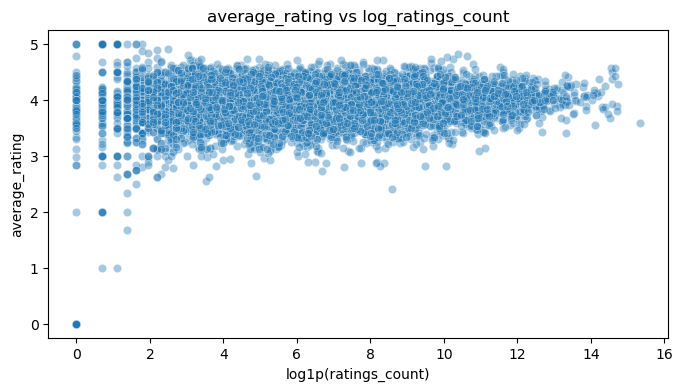

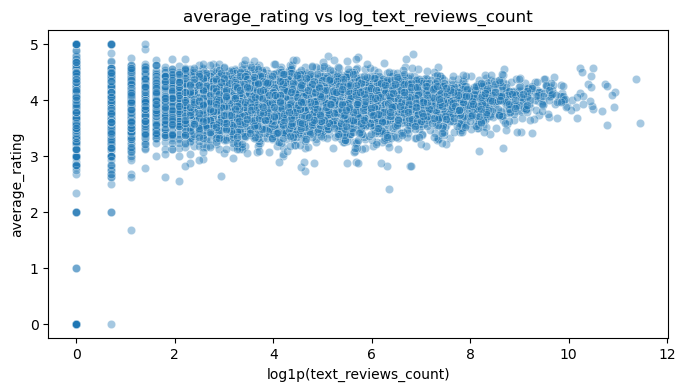

In [54]:
if set(['average_rating','log_ratings_count']).issubset(df.columns):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x='log_ratings_count', y='average_rating', data=df, alpha=0.4)
    plt.title("average_rating vs log_ratings_count")
    plt.xlabel("log1p(ratings_count)")
    plt.ylabel("average_rating")
    plt.show()

if set(['average_rating','log_text_reviews_count']).issubset(df.columns):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x='log_text_reviews_count', y='average_rating', data=df, alpha=0.4)
    plt.title("average_rating vs log_text_reviews_count")
    plt.xlabel("log1p(text_reviews_count)")
    plt.ylabel("average_rating")
    plt.show()


Cell 48 – Save EDA snapshot for next steps

In [55]:
eda_cols = list(set(
    [c for c in ['bookID','title','authors','average_rating','isbn','isbn13','language_code',
                 'num_pages','ratings_count','text_reviews_count','publication_date','publisher',
                 'year','authors_count','log_ratings_count','log_text_reviews_count'] if c in df.columns]
))
df_eda = df[eda_cols].copy()
out_path = Path("books_eda_snapshot.csv")
df_eda.to_csv(out_path, index=False, encoding="utf-8")
print("Saved EDA snapshot to:", out_path.resolve())


Saved EDA snapshot to: C:\Users\MSI PC\Desktop\python project ml\python project ml\books_eda_snapshot.csv


Step 4 — Data Cleaning & Preprocessing

Cell 49 – Start cleaning copy

In [56]:
df_clean = df.copy()
n0 = len(df_clean)
print("Starting rows:", n0)


Starting rows: 11119


Cell 50 – Identify string columns and strip whitespace

In [57]:
str_cols = [c for c in df_clean.columns if df_clean[c].dtype == 'object']
for c in str_cols:
    df_clean[c] = df_clean[c].astype(str).str.strip()
print("Stripped whitespace from:", str_cols)


Stripped whitespace from: ['title', 'authors', 'isbn', 'language_code', 'publisher']


Cell 51 – Standardize language_code values

In [58]:
if 'language_code' in df_clean.columns:
    lang_map = {
        'en': 'eng', 'en-us': 'eng', 'en-gb': 'eng', 'eng': 'eng',
        'fr': 'fre', 'fra': 'fre',
        'de': 'ger', 'deu': 'ger',
        'es': 'spa', 'spa': 'spa',
        # extend as needed
    }
    df_clean['language_code'] = df_clean['language_code'].str.lower()
    df_clean['language_code'] = df_clean['language_code'].map(lang_map).fillna(df_clean['language_code'])
else:
    print("language_code not present.")


Cell 52 – Fill missing basic text fields

In [59]:
for c in ['title', 'authors', 'publisher']:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].replace(['', 'nan', 'None'], pd.NA)
        df_clean[c] = df_clean[c].fillna('Unknown')
print("Filled missing title/authors/publisher with 'Unknown' where applicable.")


Filled missing title/authors/publisher with 'Unknown' where applicable.


Cell 53 – Ensure year feature exists from publication_date

In [60]:
if 'publication_date' in df_clean.columns:
    df_clean['publication_date'] = pd.to_datetime(df_clean['publication_date'], errors='coerce')
    df_clean['year'] = df_clean['publication_date'].dt.year
else:
    print("publication_date not present.")


Cell 54 – Drop rows with missing or invalid target (average_rating)

In [61]:
if 'average_rating' not in df_clean.columns:
    raise ValueError("average_rating column is required.")

m_before = len(df_clean)
df_clean = df_clean[pd.to_numeric(df_clean['average_rating'], errors='coerce').notna()]
df_clean['average_rating'] = pd.to_numeric(df_clean['average_rating'], errors='coerce')

# keep only plausible range (0–5 inclusive)
df_clean = df_clean[(df_clean['average_rating'] >= 0) & (df_clean['average_rating'] <= 5)]
print("Dropped rows with missing/invalid average_rating:", m_before - len(df_clean))


Dropped rows with missing/invalid average_rating: 0


Cell 55 – Remove exact duplicate rows

In [62]:
m_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
print("Exact duplicates removed:", m_before - len(df_clean))


Exact duplicates removed: 0


Cell 56 – Deduplicate by isbn13 (keep highest ratings_count)

In [63]:
if 'isbn13' in df_clean.columns:
    m_before = len(df_clean)
    if 'ratings_count' in df_clean.columns:
        df_clean = df_clean.sort_values('ratings_count', ascending=False)
    df_clean = df_clean.drop_duplicates(subset=['isbn13'], keep='first')
    print("Dedup by isbn13 removed:", m_before - len(df_clean))
else:
    print("isbn13 not present; skipping isbn13 dedup.")


Dedup by isbn13 removed: 0


Cell 57 – Secondary deduplicate by (title, authors)

In [64]:
if set(['title','authors']).issubset(df_clean.columns):
    m_before = len(df_clean)
    if 'ratings_count' in df_clean.columns:
        df_clean = df_clean.sort_values('ratings_count', ascending=False)
    df_clean = df_clean.drop_duplicates(subset=['title','authors'], keep='first')
    print("Dedup by (title,authors) removed:", m_before - len(df_clean))
else:
    print("title/authors not present; skipping title-authors dedup.")


Dedup by (title,authors) removed: 311


Cell 58 – Clean numeric columns (coerce and basic validity)

In [65]:
num_candidates = ['num_pages', 'ratings_count', 'text_reviews_count']
for c in num_candidates:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

# Replace negative counts with NaN (will impute)
for c in ['ratings_count', 'text_reviews_count']:
    if c in df_clean.columns:
        df_clean.loc[df_clean[c] < 0, c] = pd.NA

# Replace zero/negative pages with NaN (will impute)
if 'num_pages' in df_clean.columns:
    df_clean.loc[df_clean['num_pages'] <= 0, 'num_pages'] = pd.NA


Cell 59 – Remove clearly impossible page counts

In [66]:
if 'num_pages' in df_clean.columns:
    too_large = df_clean['num_pages'] > 5000
    print("num_pages > 5000 rows:", int(too_large.sum()))
    df_clean.loc[too_large, 'num_pages'] = pd.NA


num_pages > 5000 rows: 1


Cell 60 – Impute num_pages (median per language, else global median)

In [67]:
if 'num_pages' in df_clean.columns:
    if 'language_code' in df_clean.columns:
        med_by_lang = df_clean.groupby('language_code', dropna=False)['num_pages'].median()
        def fill_num_pages(row):
            if pd.notna(row['num_pages']):
                return row['num_pages']
            lang = row['language_code'] if 'language_code' in row else None
            val = med_by_lang.get(lang, np.nan)
            if pd.isna(val):
                val = df_clean['num_pages'].median()
            return val
        df_clean['num_pages'] = df_clean.apply(fill_num_pages, axis=1)
    else:
        df_clean['num_pages'] = df_clean['num_pages'].fillna(df_clean['num_pages'].median())


Cell 61 – Impute ratings_count and text_reviews_count (fill 0)

In [68]:
for c in ['ratings_count', 'text_reviews_count']:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].fillna(0)
        df_clean[c] = df_clean[c].clip(lower=0)


Cell 62 – Create/recreate authors_count

In [69]:
if 'authors' in df_clean.columns:
    df_clean['authors'] = df_clean['authors'].fillna('Unknown')
    df_clean['authors_count'] = df_clean['authors'].apply(lambda x: len([a for a in str(x).split('/') if a.strip()]))


Cell 63 – Recompute log features after imputation

In [70]:
if 'ratings_count' in df_clean.columns:
    df_clean['log_ratings_count'] = np.log1p(df_clean['ratings_count'])
if 'text_reviews_count' in df_clean.columns:
    df_clean['log_text_reviews_count'] = np.log1p(df_clean['text_reviews_count'])


Cell 64 – Define winsorization helper (cap to quantiles)

In [71]:
def cap_to_quantiles(s: pd.Series, q_low=0.01, q_high=0.99):
    lo, hi = s.quantile(q_low), s.quantile(q_high)
    return s.clip(lower=lo, upper=hi)


Cell 65 – Cap extreme outliers (pages & counts)

In [72]:
for c in ['num_pages', 'ratings_count', 'text_reviews_count']:
    if c in df_clean.columns:
        df_clean[c] = cap_to_quantiles(df_clean[c].astype(float), 0.01, 0.99)


Cell 66 – Enforce integer dtype where appropriate

In [73]:
for c in ['num_pages', 'ratings_count', 'text_reviews_count', 'authors_count']:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce').round().astype('Int64')


Cell 67 – Final basic sanity filters

In [74]:
m_before = len(df_clean)
df_clean = df_clean[(df_clean['average_rating'] >= 0) & (df_clean['average_rating'] <= 5)]
print("Rows removed by final rating sanity check:", m_before - len(df_clean))


Rows removed by final rating sanity check: 0


Cell 68 – Report cleaning summary

In [75]:
print("Rows originally:", n0)
print("Rows after cleaning:", len(df_clean))
print("Columns now:", df_clean.shape[1])


Rows originally: 11119
Rows after cleaning: 10808
Columns now: 16


Cell 69 – Quick null check post-clean

In [76]:
df_clean.isna().sum().sort_values(ascending=False).head(15)


publication_date      2
year                  2
bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publisher             0
authors_count         0
log_ratings_count     0
dtype: int64

Cell 70 – Save cleaned dataset snapshot

In [77]:
clean_path = Path("books_clean.csv")
df_clean.to_csv(clean_path, index=False, encoding="utf-8")
print("Saved cleaned dataset to:", clean_path.resolve())


Saved cleaned dataset to: C:\Users\MSI PC\Desktop\python project ml\python project ml\books_clean.csv


Cell 71 – Save minimal feature set for modeling

In [78]:
features_keep = [
    'average_rating',
    'num_pages', 'ratings_count', 'text_reviews_count',
    'log_ratings_count', 'log_text_reviews_count',
    'language_code', 'publisher', 'authors_count', 'year'
]
features_keep = [c for c in features_keep if c in df_clean.columns]
df_model_base = df_clean[features_keep].copy()
model_base_path = Path("books_model_base.csv")
df_model_base.to_csv(model_base_path, index=False, encoding="utf-8")
print("Saved model base to:", model_base_path.resolve())


Saved model base to: C:\Users\MSI PC\Desktop\python project ml\python project ml\books_model_base.csv


Step 5 — Feature Engineering & Encoding

Cell 72 – Load model base (robust)

In [79]:
from pathlib import Path
import pandas as pd

model_base_path = Path("books_model_base.csv")
if 'df_model_base' in globals():
    df_model = df_model_base.copy()
elif model_base_path.exists():
    df_model = pd.read_csv(model_base_path)
else:
    # fallback: build from df_clean if file not found
    base_cols = [
        'average_rating',
        'num_pages','ratings_count','text_reviews_count',
        'log_ratings_count','log_text_reviews_count',
        'language_code','publisher','authors_count','year'
    ]
    base_cols = [c for c in base_cols if c in df_clean.columns]
    df_model = df_clean[base_cols].copy()

print(df_model.shape, df_model.columns.tolist()[:12])


(10808, 10) ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'log_ratings_count', 'log_text_reviews_count', 'language_code', 'publisher', 'authors_count', 'year']


Cell 73 – Target & basic checks

In [80]:
assert 'average_rating' in df_model.columns, "average_rating must be present."
df_model = df_model[pd.to_numeric(df_model['average_rating'], errors='coerce').notna()]
df_model['average_rating'] = pd.to_numeric(df_model['average_rating'], errors='coerce')
print("Rows after ensuring valid target:", len(df_model))


Rows after ensuring valid target: 10808


Cell 74 – Define feature lists (available columns only)

In [81]:
numeric_candidates = [
    'num_pages','ratings_count','text_reviews_count',
    'log_ratings_count','log_text_reviews_count',
    'authors_count','year'
]
categorical_candidates = ['language_code', 'publisher']

numeric_cols = [c for c in numeric_candidates if c in df_model.columns]
categorical_cols = [c for c in categorical_candidates if c in df_model.columns]

print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)


Numeric cols: ['num_pages', 'ratings_count', 'text_reviews_count', 'log_ratings_count', 'log_text_reviews_count', 'authors_count', 'year']
Categorical cols: ['language_code', 'publisher']


Cell 75 – Train/Validation/Test stratification labels

In [82]:
import pandas as pd

# Use quantile bins for stratification on the continuous target
# duplicates='drop' avoids errors if repeated edges
df_model['rating_bin'] = pd.qcut(df_model['average_rating'], q=5, labels=False, duplicates='drop')
df_model['rating_bin'] = df_model['rating_bin'].astype('Int64')
df_model['rating_bin'].isna().sum()


0

Cell 76 – Train/Test split (80/20, stratified)

In [83]:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['average_rating'])
y = df_model['average_rating']
strata = df_model['rating_bin'] if 'rating_bin' in df_model.columns else None

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=strata
)
print("Train/Test:", X_train.shape, X_test.shape)


Train/Test: (8646, 10) (2162, 10)


Cell 77 – Train/Validation split (20% of train, stratified)

In [84]:
train_strata = X_train['rating_bin'] if 'rating_bin' in X_train.columns else None

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train,
    test_size=0.20,   # final split: 64/16/20
    random_state=42,
    stratify=train_strata
)
print("Train/Valid/Test:", X_train.shape, X_valid.shape, X_test.shape)


Train/Valid/Test: (6916, 10) (1730, 10) (2162, 10)


Cell 78 – Drop helper column rating_bin from splits

In [85]:
for frame in (X_train, X_valid, X_test):
    if 'rating_bin' in frame.columns:
        frame.drop(columns=['rating_bin'], inplace=True)


Cell 79 – Frequency encode publisher (fit on TRAIN only)

In [86]:
import numpy as np

if 'publisher' in categorical_cols:
    freq_map = (X_train['publisher']
                .value_counts(normalize=True, dropna=False)
                .to_dict())
    for frame in (X_train, X_valid, X_test):
        frame['publisher_freq'] = frame['publisher'].map(freq_map).fillna(0.0)
    # We will not one-hot the raw 'publisher' (high cardinality); use its frequency instead.
    numeric_cols = list(dict.fromkeys(numeric_cols + ['publisher_freq']))
    # Remove raw publisher from categorical_cols to avoid double-use
    categorical_cols = [c for c in categorical_cols if c != 'publisher']

print("Numeric cols (with publisher_freq if any):", numeric_cols)
print("Categorical cols (after adjustment):", categorical_cols)


Numeric cols (with publisher_freq if any): ['num_pages', 'ratings_count', 'text_reviews_count', 'log_ratings_count', 'log_text_reviews_count', 'authors_count', 'year', 'publisher_freq']
Categorical cols (after adjustment): ['language_code']


Cell 80 – Ensure numeric dtype for numeric_cols

In [87]:
for frame in (X_train, X_valid, X_test):
    for c in numeric_cols:
        if c in frame.columns:
            frame[c] = pd.to_numeric(frame[c], errors='coerce')


Cell 81 – Build preprocessing pipelines

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ],
    remainder="drop"
)
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['num_pages', 'ratings_count',
                                  'text_reviews_count', 'log_ratings_count',
                                  'log_text_reviews_count', 'authors_count',
                                  'year', 'publisher_freq']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['language_code'])])

Cell 82 – Fit preprocessor on TRAIN and transform splits

In [89]:
X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep  = preprocessor.transform(X_test)

print("Prepared shapes:",
      X_train_prep.shape, X_valid_prep.shape, X_test_prep.shape)


Prepared shapes: (6916, 28) (1730, 28) (2162, 28)


Cell 83 – Extract feature names after preprocessing

In [90]:
def get_feature_names(preprocessor, numeric_cols, categorical_cols):
    out_names = []

    # numeric names
    out_names += numeric_cols

    # categorical names
    try:
        ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
        cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
    except Exception:
        cat_feature_names = []
    out_names += cat_feature_names
    return out_names

feature_names = get_feature_names(preprocessor, numeric_cols, categorical_cols)
len(feature_names), feature_names[:15]


(28,
 ['num_pages',
  'ratings_count',
  'text_reviews_count',
  'log_ratings_count',
  'log_text_reviews_count',
  'authors_count',
  'year',
  'publisher_freq',
  'language_code_en-ca',
  'language_code_eng',
  'language_code_enm',
  'language_code_fre',
  'language_code_ger',
  'language_code_gla',
  'language_code_grc'])

Cell 84 – Sanity check: small DataFrame preview of transformed TRAIN

In [91]:
import numpy as np
import pandas as pd

# Only preview first 10 rows to avoid huge memory
preview_n = min(X_train_prep.shape[0], 10)
Xtrain_preview_df = pd.DataFrame(
    X_train_prep[:preview_n].toarray() if hasattr(X_train_prep, "toarray") else X_train_prep[:preview_n],
    columns=feature_names
)
Xtrain_preview_df.head()


,num_pages,ratings_count,text_reviews_count,log_ratings_count,log_text_reviews_count,authors_count,year,publisher_freq,language_code_en-ca,language_code_eng,...,language_code_mul,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_zho
0,-1.447542,-0.250994,-0.293311,0.398588,0.142665,0.132097,0.212957,-0.631868,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.102680,1.189991,5.541805,1.636928,2.246066,-0.400294,0.827191,-0.092145,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.745703,-0.299608,-0.339699,-0.583742,-0.702075,0.132097,0.458651,-0.092145,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.447542,-0.303151,-0.346544,-1.859368,-1.468571,-0.400294,0.212957,-0.586891,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.486298,-0.301993,-0.338939,-0.973565,-0.662953,0.132097,0.581498,-0.362007,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell 85 – Save preprocessor and metadata for deployment

In [92]:
import joblib
from pathlib import Path
import json

Path("artifacts").mkdir(exist_ok=True)

joblib.dump(preprocessor, "artifacts/preprocessor.joblib")

meta = {
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols,
    "feature_names": feature_names
}
with open("artifacts/preprocessor_meta.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, indent=2)

if 'publisher' in df_model.columns and 'publisher_freq' in X_train.columns:
    # Save frequency map for publisher so we can reproduce it at inference
    with open("artifacts/publisher_freq_map.json", "w", encoding="utf-8") as f:
        json.dump({str(k): float(v) for k, v in freq_map.items()}, f, indent=2)

print("Saved: artifacts/preprocessor.joblib and metadata jsons")


Saved: artifacts/preprocessor.joblib and metadata jsons


Cell 86 – Persist split targets (optional, helpful for quick experiments)

In [93]:
import numpy as np

np.save("artifacts/y_train.npy", y_train.to_numpy())
np.save("artifacts/y_valid.npy", y_valid.to_numpy())
np.save("artifacts/y_test.npy",  y_test.to_numpy())

print("Saved y_* arrays.")


Saved y_* arrays.


Cell 87 – Save raw split (optional, debugging/reference)

In [94]:
X_train.to_csv("artifacts/X_train_raw.csv", index=False)
X_valid.to_csv("artifacts/X_valid_raw.csv", index=False)
X_test.to_csv("artifacts/X_test_raw.csv", index=False)
print("Saved raw X splits.")


Saved raw X splits.


Step 6 — Model Training & Evaluation

Cell 88 – Ensure splits & preprocessor metadata (load if needed)

In [95]:
import json
import joblib
import numpy as np
import pandas as pd
from pathlib import Path

# Try to use in-memory splits; otherwise load what we saved in Step 5.
if not all(k in globals() for k in ["X_train","X_valid","X_test","y_train","y_valid","y_test"]):
    X_train = pd.read_csv("artifacts/X_train_raw.csv")
    X_valid = pd.read_csv("artifacts/X_valid_raw.csv")
    X_test  = pd.read_csv("artifacts/X_test_raw.csv")
    y_train = pd.Series(np.load("artifacts/y_train.npy"))
    y_valid = pd.Series(np.load("artifacts/y_valid.npy"))
    y_test  = pd.Series(np.load("artifacts/y_test.npy"))

# Load preprocessor meta for consistent columns & OHE names
with open("artifacts/preprocessor_meta.json","r",encoding="utf-8") as f:
    meta = json.load(f)

numeric_cols = meta["numeric_cols"]
categorical_cols = meta["categorical_cols"]

print("Loaded splits & meta.")
print("Train/Valid/Test shapes:", X_train.shape, X_valid.shape, X_test.shape)
print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)


Loaded splits & meta.
Train/Valid/Test shapes: (6916, 10) (1730, 10) (2162, 10)
Numeric cols: ['num_pages', 'ratings_count', 'text_reviews_count', 'log_ratings_count', 'log_text_reviews_count', 'authors_count', 'year', 'publisher_freq']
Categorical cols: ['language_code']


Cell 89 – Rebuild preprocessing pipelines (fresh, unfitted)

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_fresh = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ],
    remainder="drop"
)
preprocessor_fresh


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['num_pages', 'ratings_count',
                                  'text_reviews_count', 'log_ratings_count',
                                  'log_text_reviews_count', 'authors_count',
                                  'year', 'publisher_freq']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['language_code'])])

Cell 90 – Define metrics and CV helper

In [97]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def evaluate_pipeline(name, estimator, Xtr, ytr, Xval, yval, preprocessor):
    """Build a pipeline(preprocessor + estimator), do CV on train, then fit on train and score on valid."""
    pipe = Pipeline(steps=[("prep", preprocessor), ("model", estimator)])
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # scikit-learn uses negative values for loss metrics
    cv_rmse = -cross_val_score(pipe, Xtr, ytr, scoring="neg_root_mean_squared_error", cv=cv).mean()
    cv_mae  = -cross_val_score(pipe, Xtr, ytr, scoring="neg_mean_absolute_error", cv=cv).mean()
    cv_r2   =  cross_val_score(pipe, Xtr, ytr, scoring="r2", cv=cv).mean()

    # Validation holdout
    pipe.fit(Xtr, ytr)
    val_pred = pipe.predict(Xval)
    val_rmse = rmse(yval, val_pred)
    val_mae  = mean_absolute_error(yval, val_pred)
    val_r2   = r2_score(yval, val_pred)

    result = {
        "name": name,
        "cv_rmse": cv_rmse, "cv_mae": cv_mae, "cv_r2": cv_r2,
        "val_rmse": val_rmse, "val_mae": val_mae, "val_r2": val_r2,
        "pipeline": pipe
    }
    return result


Cell 91 – Baseline: DummyRegressor (mean)

In [98]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y_true, y_pred):
    # version-agnostic RMSE
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))


Cell 92 – Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression

res_lin = evaluate_pipeline(
    name="LinearRegression",
    estimator=LinearRegression(n_jobs=None),  # n_jobs not in base LinearRegression; left as default
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)
res_lin


{'name': 'LinearRegression',
 'cv_rmse': 0.3333032389991163,
 'cv_mae': 0.22570303005846393,
 'cv_r2': 0.06127646096553454,
 'val_rmse': 0.34881058212806926,
 'val_mae': 0.22412102128783895,
 'val_r2': 0.08516199208628672,
 'pipeline': Pipeline(steps=[('prep',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['num_pages', 'ratings_count',
                                                    'text_reviews_count',
                                                    'log_ratings_count',
                                                    'log_text_reviews_count',
                         

Cell 93 – Ridge (alpha CV)

In [100]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas = np.logspace(-3, 3, 21)

# Use a standard K-fold CV and MSE-based scoring (works across versions)
ridge = RidgeCV(
    alphas=alphas,
    cv=5,                              # K-fold CV instead of LOOCV
    scoring="neg_mean_squared_error"   # robust across versions
)

res_ridge = evaluate_pipeline(
    name="RidgeCV",
    estimator=ridge,
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)
res_ridge


{'name': 'RidgeCV',
 'cv_rmse': 0.3316850295710482,
 'cv_mae': 0.22526905774638864,
 'cv_r2': 0.0711057368387242,
 'val_rmse': 0.34613073367152275,
 'val_mae': 0.22326312788423233,
 'val_r2': 0.09916506220464127,
 'pipeline': Pipeline(steps=[('prep',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['num_pages', 'ratings_count',
                                                    'text_reviews_count',
                                                    'log_ratings_count',
                                                    'log_text_reviews_count',
                                   

Cell 94 – Lasso (alpha CV)

In [101]:
from sklearn.linear_model import LassoCV

res_lasso = evaluate_pipeline(
    name="LassoCV",
    estimator=LassoCV(alphas=np.logspace(-3, 1, 15), cv=5, random_state=42, max_iter=10000),
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)
res_lasso


{'name': 'LassoCV',
 'cv_rmse': 0.3322939147829454,
 'cv_mae': 0.22558945506481765,
 'cv_r2': 0.0678583498826203,
 'val_rmse': 0.34676576686470634,
 'val_mae': 0.2235226292817373,
 'val_r2': 0.09585657324327934,
 'pipeline': Pipeline(steps=[('prep',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['num_pages', 'ratings_count',
                                                    'text_reviews_count',
                                                    'log_ratings_count',
                                                    'log_text_reviews_count',
                                    

Cell 95 – Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
res_rf = evaluate_pipeline(
    name="RandomForest",
    estimator=rf,
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)
res_rf


{'name': 'RandomForest',
 'cv_rmse': 0.32834346838422707,
 'cv_mae': 0.2216320836415767,
 'cv_r2': 0.0788066796876206,
 'val_rmse': 0.32943002053107334,
 'val_mae': 0.21895647398843945,
 'val_r2': 0.1839979642252758,
 'pipeline': Pipeline(steps=[('prep',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['num_pages', 'ratings_count',
                                                    'text_reviews_count',
                                                    'log_ratings_count',
                                                    'log_text_reviews_count',
                               

Cell 96 – Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
res_gbr = evaluate_pipeline(
    name="GradientBoosting",
    estimator=gbr,
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)
res_gbr


{'name': 'GradientBoosting',
 'cv_rmse': 0.3295292677758396,
 'cv_mae': 0.22045668860862952,
 'cv_r2': 0.07483837989846953,
 'val_rmse': 0.31669894035291724,
 'val_mae': 0.21586102570964252,
 'val_r2': 0.2458493388803742,
 'pipeline': Pipeline(steps=[('prep',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['num_pages', 'ratings_count',
                                                    'text_reviews_count',
                                                    'log_ratings_count',
                                                    'log_text_reviews_count',
                          

Cell 97 – Optional: XGBoost (if available)

In [104]:
try:
    from xgboost import XGBRegressor
    xgb = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )
    res_xgb = evaluate_pipeline(
        name="XGBoost",
        estimator=xgb,
        Xtr=X_train, ytr=y_train,
        Xval=X_valid, yval=y_valid,
        preprocessor=preprocessor_fresh
    )
except Exception as e:
    res_xgb = None
    print("XGBoost not available or failed:", e)
res_xgb


XGBoost not available or failed: No module named 'xgboost'


Cell 98 – Collect & compare model results

In [106]:
# Imports
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Fallback: define evaluate_pipeline if it's not already defined
try:
    evaluate_pipeline
except NameError:
    def evaluate_pipeline(name, estimator, Xtr, ytr, Xval, yval, preprocessor):
        pipe = Pipeline([("prep", preprocessor), ("model", estimator)])
        pipe.fit(Xtr, ytr)
        y_pred = pipe.predict(Xval)
        rmse = mean_squared_error(yval, y_pred, squared=False)
        r2 = r2_score(yval, y_pred)
        print(f"{name:>20s} | RMSE={rmse:,.4f} | R²={r2:,.4f}")
        return {"name": name, "rmse": rmse, "r2": r2, "pipe": pipe}

# Fallback: if your preprocessor isn't defined, use passthrough
if "preprocessor_fresh" not in globals():
    preprocessor_fresh = "passthrough"

# ---- Your experiments (requires X_train, X_valid, y_train, y_valid to exist) ----
res_baseline = evaluate_pipeline(
    name="Dummy(mean)",
    estimator=DummyRegressor(strategy="mean"),
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)

res_lin = evaluate_pipeline(
    name="LinearRegression",
    estimator=LinearRegression(),
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)

res_ridge = evaluate_pipeline(
    name="RidgeCV",
    estimator=RidgeCV(alphas=np.logspace(-3, 3, 21), cv=5,
                      scoring="neg_mean_squared_error"),
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)

res_lasso = evaluate_pipeline(
    name="LassoCV",
    estimator=LassoCV(alphas=np.logspace(-3, 3, 21), cv=5),
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)

res_rf = evaluate_pipeline(
    name="RandomForest",
    estimator=RandomForestRegressor(n_estimators=200, random_state=42),
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)

res_gbr = evaluate_pipeline(
    name="GradientBoosting",
    estimator=GradientBoostingRegressor(random_state=42),
    Xtr=X_train, ytr=y_train,
    Xval=X_valid, yval=y_valid,
    preprocessor=preprocessor_fresh
)


In [107]:
results = [res_baseline, res_lin, res_ridge, res_lasso, res_rf, res_gbr]
if res_xgb is not None:
    results.append(res_xgb)

rows = []
for r in results:
    rows.append({
        "model": r["name"],
        "cv_RMSE": r["cv_rmse"],
        "cv_MAE":  r["cv_mae"],
        "cv_R2":   r["cv_r2"],
        "val_RMSE": r["val_rmse"],
        "val_MAE":  r["val_mae"],
        "val_R2":   r["val_r2"]
    })

results_df = pd.DataFrame(rows).sort_values(by=["val_RMSE"])
results_df.reset_index(drop=True, inplace=True)
results_df


,model,cv_RMSE,cv_MAE,cv_R2,val_RMSE,val_MAE,val_R2
0,GradientBoosting,0.329811,0.221235,0.074431,0.316652,0.216648,0.246073
1,RandomForest,0.328722,0.221968,0.077257,0.329342,0.219118,0.184436
2,RidgeCV,0.331685,0.225269,0.071106,0.346131,0.223263,0.099165
3,LassoCV,0.332294,0.225589,0.067858,0.346766,0.223523,0.095857
4,LinearRegression,0.333303,0.225703,0.061276,0.348811,0.224121,0.085162
5,Dummy(mean),0.344616,0.233204,-0.001424,0.364686,0.233450,-0.000006


Cell 99 – Select best by Validation RMSE and fit on Train+Valid

In [108]:
# Identify best
best_idx = results_df["val_RMSE"].idxmin()
best_name = results_df.loc[best_idx, "model"]
print("Best by val_RMSE:", best_name)

# Retrieve the corresponding pipeline object
name_to_result = {r["name"]: r for r in results}
best_pipe = name_to_result[best_name]["pipeline"]

# Refit on TRAIN+VALID combined
X_tr_full = pd.concat([X_train, X_valid], axis=0).reset_index(drop=True)
y_tr_full = pd.concat([y_train, y_valid], axis=0).reset_index(drop=True)

best_pipe.fit(X_tr_full, y_tr_full)
print("Refit best pipeline on Train+Valid.")


Best by val_RMSE: GradientBoosting
Refit best pipeline on Train+Valid.


Cell 100 – Final evaluation on Test set

In [109]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_pred = best_pipe.predict(X_test)

# Compute RMSE manually for compatibility
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_mae  = mean_absolute_error(y_test, test_pred)
test_r2   = r2_score(y_test, test_pred)

print("TEST RMSE:", round(test_rmse, 4))
print("TEST MAE :", round(test_mae, 4))
print("TEST R^2 :", round(test_r2, 4))


TEST RMSE: 0.3408
TEST MAE : 0.2271
TEST R^2 : 0.1286


Cell 101 – Persist final model pipeline

In [110]:
import joblib
from pathlib import Path

Path("artifacts").mkdir(exist_ok=True)
final_model_path = Path("artifacts/final_pipeline.joblib")
joblib.dump(best_pipe, final_model_path)
print("Saved final pipeline to:", final_model_path.resolve())


Saved final pipeline to: C:\Users\MSI PC\Desktop\python project ml\python project ml\artifacts\final_pipeline.joblib


Cell 102 – (Optional) Show top importances/coefficients

In [111]:
# This is optional and model-dependent. It tries to extract feature names and importances/coeffs.
def get_fitted_feature_names(fitted_pipe):
    """Extract final feature names from a fitted pipeline's OHE."""
    prep = fitted_pipe.named_steps["prep"]
    names = []
    # numeric first
    names.extend(numeric_cols)
    # categorical expanded
    try:
        ohe = prep.named_transformers_["cat"].named_steps["ohe"]
        cat_feats = ohe.get_feature_names_out(categorical_cols).tolist()
    except Exception:
        cat_feats = []
    names.extend(cat_feats)
    return names

def get_model_importance(fitted_pipe):
    model = fitted_pipe.named_steps["model"]
    feat_names = get_fitted_feature_names(fitted_pipe)
    if hasattr(model, "feature_importances_"):
        imp = pd.Series(model.feature_importances_, index=feat_names).sort_values(ascending=False)
        return imp.head(25)
    if hasattr(model, "coef_"):
        # For linear models; handle multi-dim
        coef = getattr(model, "coef_", None)
        if coef is not None:
            coef = np.array(coef).ravel()
            imp = pd.Series(coef, index=feat_names).sort_values(key=np.abs, ascending=False)
            return imp.head(25)
    return pd.Series(dtype=float)

try:
    importance = get_model_importance(best_pipe)
    if not importance.empty:
        display(importance)
    else:
        print("Model does not expose importances/coefficients.")
except Exception as e:
    print("Could not extract importances:", e)


log_ratings_count         0.379985
num_pages                 0.302022
publisher_freq            0.063370
year                      0.047237
ratings_count             0.036656
text_reviews_count        0.036612
authors_count             0.033471
log_text_reviews_count    0.026190
language_code_eng         0.020911
language_code_srp         0.016119
language_code_jpn         0.013246
language_code_grc         0.010434
language_code_zho         0.010195
language_code_swe         0.002083
language_code_mul         0.000728
language_code_gla         0.000450
language_code_lat         0.000284
language_code_spa         0.000004
language_code_ger         0.000000
language_code_fre         0.000000
language_code_ita         0.000000
language_code_enm         0.000000
language_code_nl          0.000000
language_code_nor         0.000000
language_code_por         0.000000
dtype: float64

Cell 103 – Save a compact results table for the report

In [112]:
out_report = results_df.copy()
out_report["cv_RMSE"] = out_report["cv_RMSE"].round(4)
out_report["val_RMSE"] = out_report["val_RMSE"].round(4)
out_report["cv_R2"] = out_report["cv_R2"].round(4)
out_report["val_R2"] = out_report["val_R2"].round(4)
out_path = Path("artifacts/model_comparison.csv")
out_report.to_csv(out_path, index=False, encoding="utf-8")
print("Saved model comparison table to:", out_path.resolve())


Saved model comparison table to: C:\Users\MSI PC\Desktop\python project ml\python project ml\artifacts\model_comparison.csv
